In [1]:
import pandas as pd
import matplotlib. pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('Downloads/novozymes-enzyme-stability-prediction/train.csv')
test_df= pd.read_csv('Downloads/novozymes-enzyme-stability-prediction/test.csv')
#dt_sample = pd.read_csv('Downloads/novozymes-enzyme-stability-prediction/sample_submission.csv')
#dt_train_up= pd.read_csv('Downloads/novozymes-enzyme-stability-prediction/train_updates_20220929.csv')
#dt_wildtyp = pd.read_csv('Downloads/novozymes-enzyme-stability-prediction/wildtype_structure_prediction_af2.pdb')

In [3]:
data.shape

(31390, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31390 entries, 0 to 31389
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            31390 non-null  int64  
 1   protein_sequence  31390 non-null  object 
 2   pH                31104 non-null  float64
 3   data_source       28043 non-null  object 
 4   tm                31390 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [5]:
data.isnull().sum()

seq_id                 0
protein_sequence       0
pH                   286
data_source         3347
tm                     0
dtype: int64

In [ ]:
# ph- 286 null values
#data_source- 3347 null values

In [6]:
data['pH'].value_counts() # object containing counts of unique values

7.00     26462
7.50       576
8.00       502
3.00       288
2.70       274
         ...  
3.14         1
2.53         1
2.81         1
39.00        1
10.30        1
Name: pH, Length: 115, dtype: int64

In [7]:
data['data_source'].eq('Novozymes').any()

False

In [8]:
data.drop(['data_source'], axis = 1, inplace = True)

In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

seq_id              0
protein_sequence    0
pH                  0
tm                  0
dtype: int64

In [11]:
test_df

,seq_id,protein_sequence,pH,data_source
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
...,...,...,...,...
2408,33798,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2409,33799,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2410,33800,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2411,33801,VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2413 entries, 0 to 2412
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   seq_id            2413 non-null   int64 
 1   protein_sequence  2413 non-null   object
 2   pH                2413 non-null   int64 
 3   data_source       2413 non-null   object
dtypes: int64(2), object(2)
memory usage: 75.5+ KB


In [13]:
test_df.isnull().sum()

seq_id              0
protein_sequence    0
pH                  0
data_source         0
dtype: int64

In [14]:
test_df.drop(['data_source'], axis = 1, inplace = True)

In [15]:
test_df

,seq_id,protein_sequence,pH
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8
...,...,...,...
2408,33798,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8
2409,33799,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8
2410,33800,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8
2411,33801,VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8


# Analysis

<AxesSubplot:xlabel='tm', ylabel='Count'>

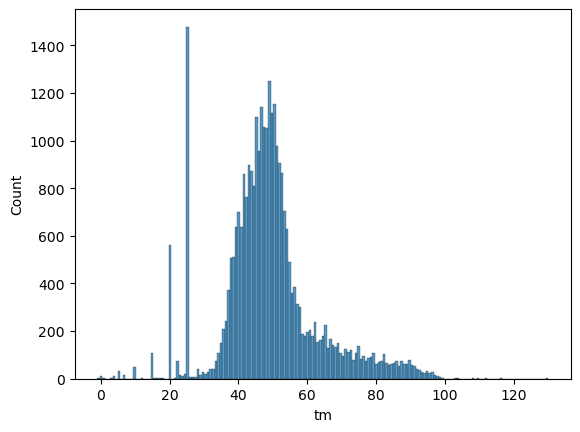

In [16]:
sns.histplot(data['tm'])

(0.0, 30.0)

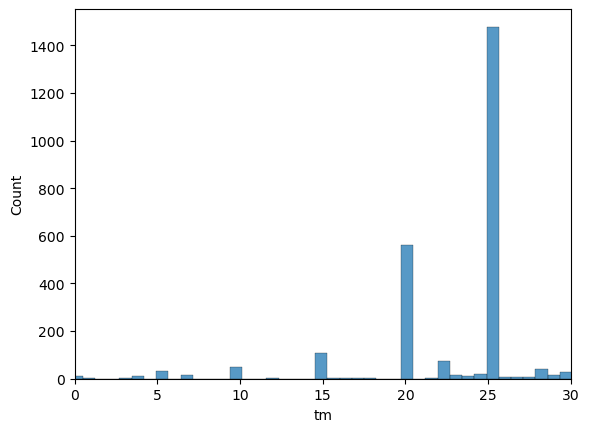

In [17]:
j = sns.histplot(data['tm'])
j.set_xlim(0,30)

In [18]:
# Eliminating the outliers
data = data[(data['tm'] != 25) & (data['tm'] != 20)]

<AxesSubplot:xlabel='tm', ylabel='Count'>

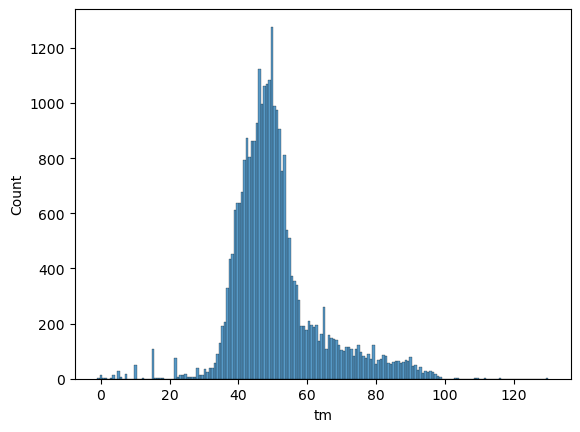

In [19]:
sns.histplot(data['tm'])

(10.0, 100.0)

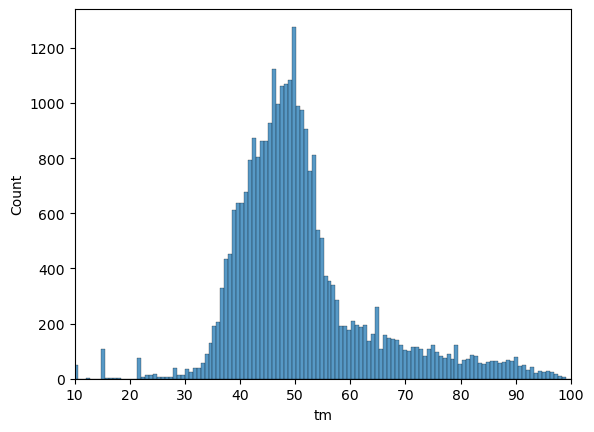

In [20]:
j1 = sns.histplot(data['tm'])
j1.set_xlim(10,100)

In [23]:
#sns.boxplot(data['tm'])

Enzymes are affected by changes in pH. 
The most favorable pH value - the point where the enzyme is most active - is known as the optimum pH. = 7.2

<AxesSubplot:xlabel='pH', ylabel='Count'>

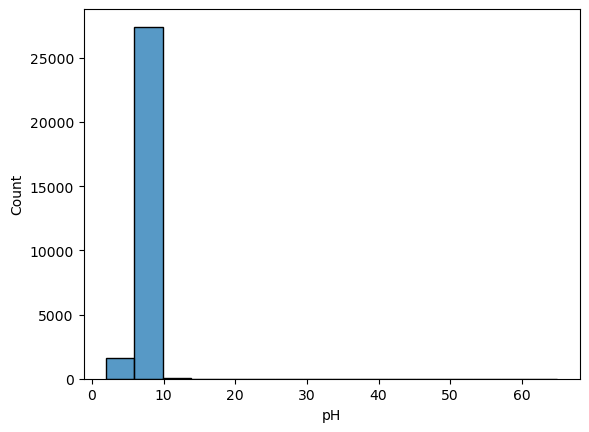

In [22]:
sns.histplot(data['pH'])

In [24]:
#plt.scatter(data['tm']['pH'],target)
#plt.show()

In [25]:
#sns.boxplot(x=data['pH'], y= target)

In [26]:
len(data.protein_sequence[2])

497

In [27]:
l = []
for i in data['protein_sequence']:
    l += set(i)   

In [28]:
set(l)

{'A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y'}

In [29]:
data['protein_sequence']

0        AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...
1        AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...
2        AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...
3        AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...
4        AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...
                               ...                        
31385    YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...
31386    YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...
31387    YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...
31388    YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...
31389    YYVPDEYWQSLEVAHKLTFGYGYLTWEWVQGIRSYVYPLLIAGLYK...
Name: protein_sequence, Length: 29071, dtype: object

In [38]:
import re

def sequence_count(df):
    search_amino=['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
    for amino_acid in search_amino:
         df[amino_acid]=df['protein_sequence'].str.count(amino_acid,re.I)
    return df

In [36]:
data = sequence_count(data)
test_df = sequence_count(test_df)

In [39]:
data.columns

Index(['seq_id', 'protein_sequence', 'pH', 'tm',
       'YYVPDEYWQSLEVAHKLTFGYGYLTWEWVQGIRSYVYPLLIAGLYKILALLQLDSAHLLVVLPRIVQALLSAYSDYRFFVWTGKRKWALFLILVPWFWFYTGSRTLANTLEASLTTIALSYFPWYGESTAYLWPAAICCFLRPTAAVIWLPLSLYHLRRSRQNVLELILKRFVLIGLLVAGLGIAIDTYWHGQLIVTPYEFLKYNIFNNIGSFYGSHPWHWYFSVGLPTVLGINTLPFIFGVMETVKKSEKYPVSKQLLITIFLTLVVLSAVEHKEFRFVSPLLPLCLYVITDALSRWSIRASSTMLWTTALVILVGNVMPAWYLSTVHQKGPIELMPKLREIAREYRDEREHQANILFLMPCHSTPYYSHIHQNVTMRFLTCEPNLEKKEQYKDEADRFFEDPVHWINSHIPMHPLTALPTHVVLFDPLAENISVFLRNYRLLHRIEHAEVTRLEGSQALVDQWSEALGAQSPNLASLLQNRQSRTGRSILVYQRLKKGEENAFNRGPDSGQHEPDVHDHPPLEDLVLANENENLF',
       'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q',
       'R', 'S', 'T', 'V', 'W', 'Y'],
      dtype='object')

In [42]:
data.drop(['YYVPDEYWQSLEVAHKLTFGYGYLTWEWVQGIRSYVYPLLIAGLYKILALLQLDSAHLLVVLPRIVQALLSAYSDYRFFVWTGKRKWALFLILVPWFWFYTGSRTLANTLEASLTTIALSYFPWYGESTAYLWPAAICCFLRPTAAVIWLPLSLYHLRRSRQNVLELILKRFVLIGLLVAGLGIAIDTYWHGQLIVTPYEFLKYNIFNNIGSFYGSHPWHWYFSVGLPTVLGINTLPFIFGVMETVKKSEKYPVSKQLLITIFLTLVVLSAVEHKEFRFVSPLLPLCLYVITDALSRWSIRASSTMLWTTALVILVGNVMPAWYLSTVHQKGPIELMPKLREIAREYRDEREHQANILFLMPCHSTPYYSHIHQNVTMRFLTCEPNLEKKEQYKDEADRFFEDPVHWINSHIPMHPLTALPTHVVLFDPLAENISVFLRNYRLLHRIEHAEVTRLEGSQALVDQWSEALGAQSPNLASLLQNRQSRTGRSILVYQRLKKGEENAFNRGPDSGQHEPDVHDHPPLEDLVLANENENLF'], axis = 1, inplace = True)

In [43]:
data.columns

Index(['seq_id', 'protein_sequence', 'pH', 'tm', 'A', 'C', 'D', 'E', 'F', 'G',
       'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'],
      dtype='object')

In [44]:
data.drop(['protein_sequence'], axis = 1, inplace = True)
test_df.drop(['protein_sequence'], axis = 1, inplace = True)

In [45]:
data

,seq_id,pH,tm,A,C,D,E,F,G,H,...,M,N,P,Q,R,S,T,V,W,Y
0,0,7.0,75.7,45,1,13,30,13,38,3,...,8,5,18,6,25,11,14,37,4,3
1,1,7.0,50.5,28,0,10,52,6,18,4,...,2,6,8,22,30,14,12,13,3,3
2,2,7.0,40.5,50,9,27,32,21,65,11,...,6,15,20,25,31,33,30,30,3,16
3,3,7.0,47.2,20,5,19,29,12,16,7,...,2,9,16,9,10,16,19,14,3,4
4,4,7.0,49.5,86,14,78,78,32,84,40,...,31,65,128,54,63,148,120,124,16,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31385,31385,7.0,51.8,33,12,38,31,18,51,15,...,13,24,25,24,42,33,18,42,13,18
31386,31386,7.0,37.2,37,5,21,29,22,27,22,...,14,19,19,16,25,37,26,34,5,14
31387,31387,7.0,64.6,13,1,7,7,7,11,2,...,7,5,6,8,3,10,6,7,4,4
31388,31388,7.0,50.7,47,5,34,36,23,52,11,...,26,25,31,12,25,51,32,48,3,18


In [46]:
test_df

,seq_id,pH,A,C,D,E,F,G,H,I,...,M,N,P,Q,R,S,T,V,W,Y
0,31390,8,22,4,15,8,10,19,0,6,...,0,19,17,13,3,18,8,13,6,6
1,31391,8,22,4,15,7,10,19,0,6,...,0,19,17,13,3,18,8,13,6,6
2,31392,8,22,4,15,7,10,19,0,6,...,0,19,17,13,3,18,8,13,6,6
3,31393,8,22,5,15,7,10,19,0,6,...,0,19,17,13,3,18,8,13,6,6
4,31394,8,22,4,15,7,11,19,0,6,...,0,19,17,13,3,18,8,13,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,33798,8,21,4,15,7,10,19,0,7,...,0,19,17,13,3,18,8,13,6,6
2409,33799,8,21,4,15,7,10,19,0,6,...,0,19,17,13,3,18,8,13,6,6
2410,33800,8,21,4,15,7,10,19,0,6,...,0,20,17,13,3,18,8,13,6,6
2411,33801,8,21,4,15,7,10,19,0,6,...,0,19,18,13,3,18,8,13,6,6


In [47]:
X = data.drop(['tm'],axis = 1)
y = data['tm']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train,y_valid= train_test_split(X,y, test_size= 0.3, random_state = 42)

In [49]:
import numpy as np
from sklearn import metrics
def performance_metrics(pred):
    print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_valid, pred))
    print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_valid, pred))
    print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_valid, pred)))
    

# Random forest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

In [52]:
rf = RandomForestRegressor()

In [53]:
from pprint import pprint
# find the parameters used by Randomforest models
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [54]:
from scipy.stats import randint

random_grid={'max_depth':list(np.arange(10, 100, step=10)),
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [55]:
# Use the random grid to search for best and optimum hyperparameters
#tuning the hyperparameters
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 50, scoring='neg_mean_absolute_error', 
                              cv =3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019543EDF880>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019543EE4430>,
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460])},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [56]:
rf_random.best_params_

{'max_depth': 70,
 'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 360}

In [57]:
y_predict= rf_random.predict(X_valid)
y_predict.shape

(8722,)

In [58]:
  rf_random.predict(test_df)

array([50.62585918, 50.73108735, 50.66926195, ..., 50.85048418,
       50.80627518, 50.60728264])

In [59]:
y_predict

array([56.767734  , 45.29118848, 47.42578588, ..., 49.13985784,
       48.3646301 , 50.7861966 ])

In [60]:
performance_metrics(y_predict) # Randforest

Mean Absolute Error (MAE): 5.763345611148832
Mean Squared Error (MSE): 61.969713573433225
Root Mean Squared Error (RMSE): 7.872084449079114


In [76]:
X_train.shape

(20349, 22)

# Linear regression

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
linear_model = LinearRegression()

In [63]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [64]:
predict_linear_model = linear_model.predict(X_valid)

In [65]:
predict_linear_model

array([53.20653453, 44.55806274, 50.02592728, ..., 50.59337326,
       48.18351396, 55.56442427])

In [66]:
performance_metrics(predict_linear_model) # linear reg

Mean Absolute Error (MAE): 8.779716463438092
Mean Squared Error (MSE): 142.59854164371865
Root Mean Squared Error (RMSE): 11.941463128265257


# Least Angle regression

In [70]:
from sklearn.linear_model import Lars

In [71]:
lars_model= Lars()

In [72]:
lars_model.fit(X_train,y_train)

C:\Users\Bavi\anaconda_1_3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Lars()

In [73]:
predict_lars_model = lars_model.predict(X_valid)

In [74]:
performance_metrics(predict_lars_model) # least angle

Mean Absolute Error (MAE): 8.86539944475298
Mean Squared Error (MSE): 144.1869630575894
Root Mean Squared Error (RMSE): 12.007787600452858
